In [15]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from keras.layers import Dense, LSTM, Flatten, Dropout 
from keras.models import Sequential 

In [16]:
data = pd.read_csv('preprocessed_dataset.csv')
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,False,False,False,False,True,False
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,False,False,False,False,True,False
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,True,False,False,False,False,False
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
148513,-0.112481,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
148514,-0.112481,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,-0.059832,1.217658,0.033509,...,False,False,False,False,False,False,False,False,True,False
148515,-0.112481,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,False,False,False,False,True,False


In [17]:
y_data= data['intrusion']
X_data= data.drop(labels=['intrusion'], axis=1)

In [18]:
X_data=np.array(X_data)
y_data=np.array(y_data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(118813, 122) 
 (29704, 122)


In [20]:
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))

In [21]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [29]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)


In [30]:
y_train = y_train_encoded
y_test = y_test_encoded

In [31]:
model = Sequential() 
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax azctivation
model.add(Dense(units=5,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 8s 158ms/step - loss: 1.4875 - accuracy: 0.8923 - val_loss: 1.2323 - val_accuracy: 0.9414
Epoch 2/100
20/20 [==============================] - 2s 94ms/step - loss: 0.7607 - accuracy: 0.9404 - val_loss: 0.2759 - val_accuracy: 0.9561
Epoch 3/100
20/20 [==============================] - 2s 115ms/step - loss: 0.2046 - accuracy: 0.9644 - val_loss: 0.1665 - val_accuracy: 0.9674
Epoch 4/100
20/20 [==============================] - 2s 96ms/step - loss: 0.1332 - accuracy: 0.9707 - val_loss: 0.1114 - val_accuracy: 0.9714
Epoch 5/100
20/20 [==============================] - 2s 94ms/step - loss: 0.0970 - accuracy: 0.9753 - val_loss: 0.0849 - val_accuracy: 0.9760
Epoch 6/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0754 - accuracy: 0.9810 - val_loss: 0.0677 - val_accuracy: 0.9838
Epoch 7/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0608 - accuracy: 0.9845 - val_loss: 0.0556 - val_accuracy: 0.9840
Epo

In [34]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

929/929 [==============================] - 4s 4ms/step - loss: 0.0052 - accuracy: 0.9987
Test results - Loss: 0.005208370741456747 - Accuracy: 99.86533522605896%


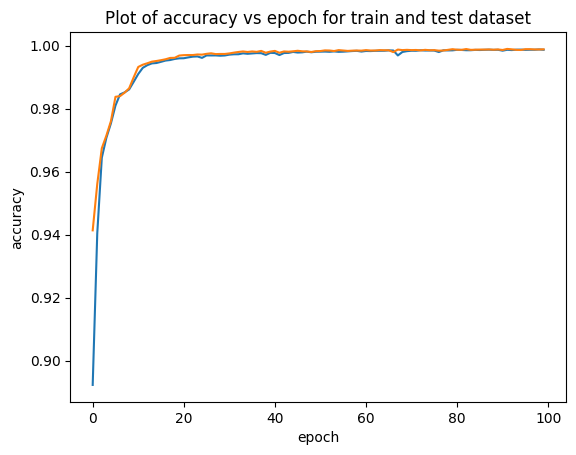

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

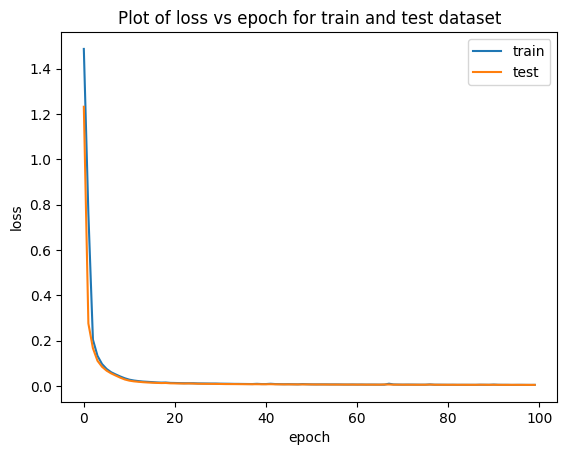

In [36]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()